<a href="https://colab.research.google.com/github/amartsin/Covid_Prediction/blob/main/Covid_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('metadata.csv')

In [ ]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [ ]:
df.describe()

,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
count,697.000000,713.000000,78.000000,119.000000,16.000000,28.000000,40.000000
mean,9.083214,53.534362,38.898718,78.475630,5.024375,5.307143,4.638050
std,31.664077,16.949007,6.494383,38.742573,2.660341,3.489956,20.550033
min,-360.000000,18.000000,36.000000,20.000000,0.220000,0.000000,0.400000
25%,1.000000,40.000000,37.800000,55.000000,3.067500,2.725000,0.746500
50%,5.000000,54.000000,38.150000,85.000000,4.745000,4.800000,1.100000
75%,10.000000,68.000000,38.975000,95.000000,6.857500,6.925000,1.600000
max,365.000000,94.000000,95.000000,340.000000,11.200000,12.900000,131.000000


In [ ]:
df[df['finding'] == 'Pneumonia/Viral/COVID-19']['leukocyte_count'].value_counts()

6.40     1
3.13     1
2.85     1
3.15     1
2.88     1
7.40     1
11.20    1
6.91     1
6.84     1
6.37     1
0.22     1
3.98     1
7.00     1
5.50     1
Name: leukocyte_count, dtype: int64

In [ ]:
len(df['finding'].unique())
#25 different type of diseases are there in the dataset

25

In [ ]:
df[df['age']>50]['finding']

0            Pneumonia/Viral/COVID-19
1            Pneumonia/Viral/COVID-19
2            Pneumonia/Viral/COVID-19
3            Pneumonia/Viral/COVID-19
4            Pneumonia/Viral/COVID-19
                    ...              
936          Pneumonia/Viral/COVID-19
941    Pneumonia/Bacterial/Legionella
942    Pneumonia/Bacterial/Legionella
943                        No Finding
944                         Pneumonia
Name: finding, Length: 390, dtype: object

In [ ]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [ ]:
x = df['finding']== 'Pneumonia/Viral/COVID-19'

In [ ]:
y = df[df['finding']== 'Pneumonia/Viral/COVID-19']['age'].median()
#plt.hist(y,bins =40)
#histogram to know the age who has been tested with Covid 19 positive results 
y


58.0

In [ ]:
df[ df['finding']=='Pneumonia/Viral/COVID-19']['RT_PCR_positive'].value_counts()

Y          359
Unclear    215
Name: RT_PCR_positive, dtype: int64

In [ ]:
df['pO2_saturation'].isnull().sum()#we need to drop this column 

831

In [ ]:
sizes = np.array(df['finding'].value_counts())
df['finding']=='Pneumonia/Viral/COVID-19'

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,474,NaN,M,55.0,Pneumonia/Viral/COVID-19,Unclear,NaN,NaN,NaN,NaN,...,2020,"Al Hasa, Saudi Arabia",images,2edb88df42cab5e5fbc18b3965e0bd_jumbo.jpeg,NaN,https://radiopaedia.org/cases/covid-19-pneumon...,CC BY-NC-SA,"Fever, abdominal pain and diarrhea. No cough o...","Case courtesy of Dr Osama Rizk, Radiopaedia.o...",NaN
937,475,0.0,M,50.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,Y,...,2020,"California, United States",images,16858_1_1.png,NaN,https://www.eurorad.org/case/16858,CC BY-NC-SA 4.0,A 50-year-old male with recent positive corona...,NaN,NaN
938,475,2.0,M,50.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,Y,...,2020,"California, United States",images,16858_3_1.png,NaN,https://www.eurorad.org/case/16858,CC BY-NC-SA 4.0,A 50-year-old male with recent positive corona...,NaN,NaN
939,476,3.0,M,25.0,Pneumonia/Viral/COVID-19,Y,Y,NaN,NaN,NaN,...,2020,"Hospital Universitario Severo Ochoa, Madrid, S...",images,16865_1_1.jpg,NaN,https://www.eurorad.org/case/16865,CC BY-NC-SA 4.0,A 25 year-old male resident presented with a 7...,NaN,NaN


In [ ]:
df.corr()

,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
offset,1.000000,-0.001992,0.085304,0.164643,-0.156749,0.148430,-0.009622
age,-0.001992,1.000000,0.176245,-0.174707,0.492587,0.596002,0.528551
temperature,0.085304,0.176245,1.000000,-0.224417,0.119528,0.575253,-0.342545
pO2_saturation,0.164643,-0.174707,-0.224417,1.000000,-0.844946,0.226702,0.263767
leukocyte_count,-0.156749,0.492587,0.119528,-0.844946,1.000000,0.994478,-0.061150
neutrophil_count,0.148430,0.596002,0.575253,0.226702,0.994478,1.000000,0.039701
lymphocyte_count,-0.009622,0.528551,-0.342545,0.263767,-0.061150,0.039701,1.000000


In [ ]:
df  =df.drop(['offset'],axis=1)


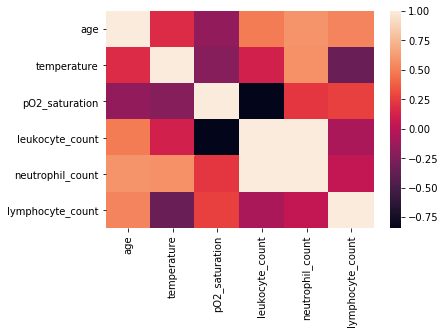

In [ ]:
sns.heatmap(df.corr())

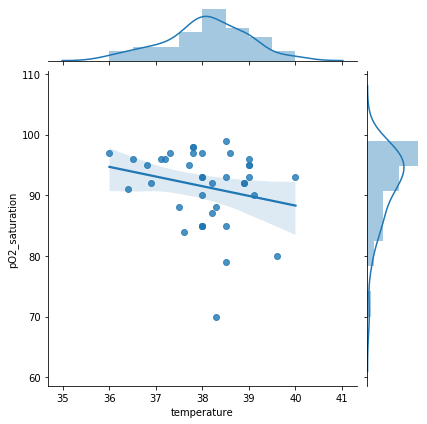

In [ ]:
sns.jointplot(y='pO2_saturation',x='temperature',data= df,kind='reg')

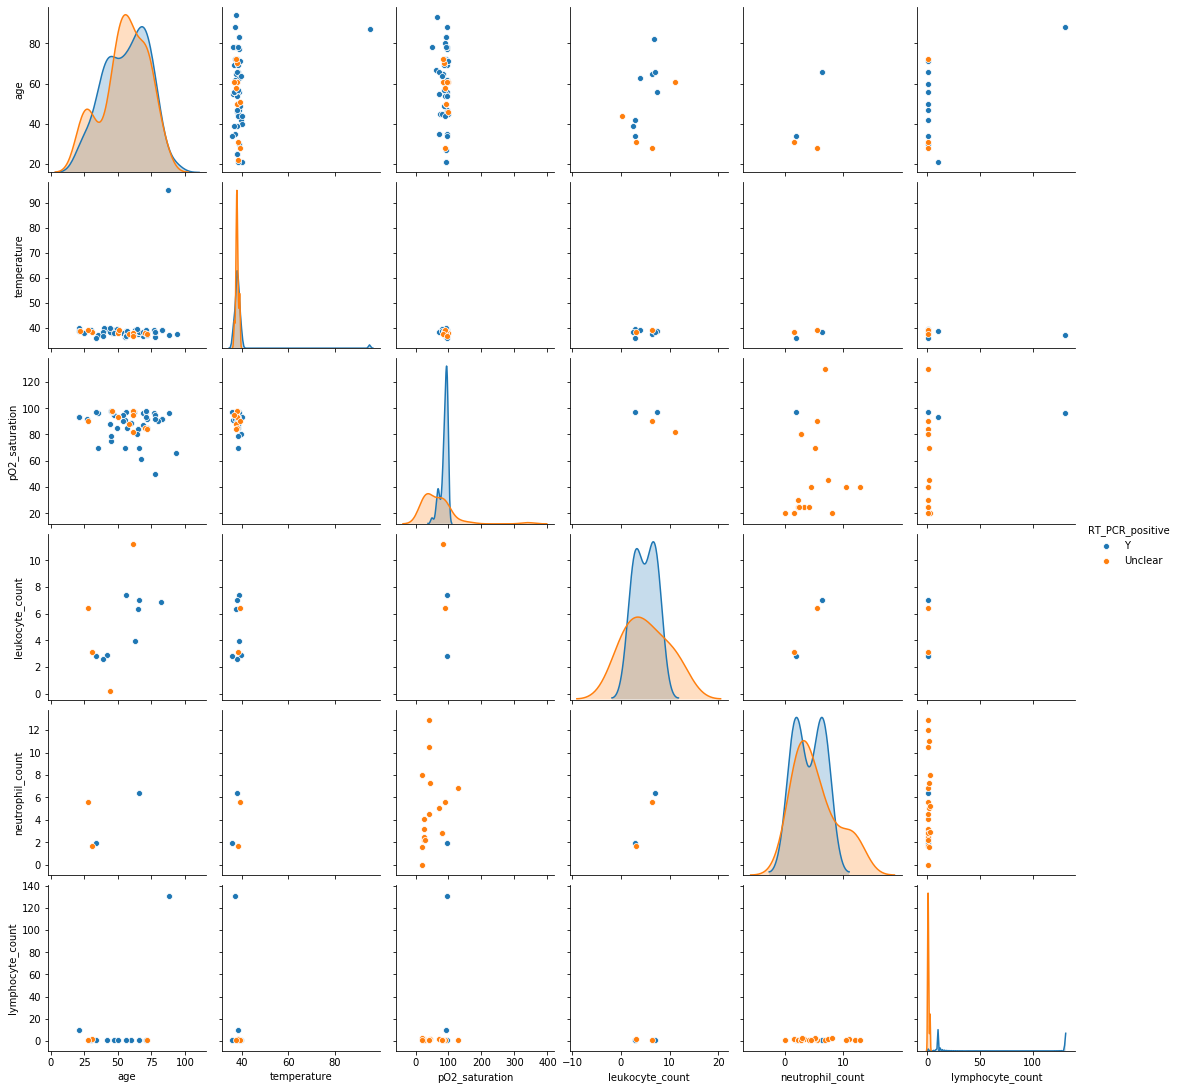

In [ ]:
sns_plot =sns.pairplot(df,hue = 'RT_PCR_positive')
sns_plot.savefig("data.png")